# K- Means Clustering

* K-means clustering is an example of centroid clustering.
* K defines the number of predefined clusters that need to be created in the process.
* K-means, clusters data points based on the nearest mean(centroid).
* Aim : To minimize the sum of distances between the data point and their corresponding clusters.

## Steps of K-means Clustering

1. This algorithm requires us to specify thr number of clusters.
2. It makes group of data points based on the specified clusters.
3. The algo computes the cluster centroid.
4. The algo reassigns data points to the closest centroid.
5. The algo again computes the centroid of each cluster.

After completing thesesteps algo iterate through steps 4 and 5 untill no improvement are possible. Reaching the final results is called global optima.

# finding the optimum no of clusters:
1. Elbow Method:
    
    Elbow Method:

Run k-means clustering for different values of k and calculate the sum of squared distances (inertia) from each point to its assigned center.
Plot the inertia as a function of k.
Look for the "elbow" point where the rate of decrease in inertia sharply changes. The idea is to find the k where adding more clusters does not significantly improve the model.
    



In [4]:
# Load dataset
import pandas as pd
data=pd.read_csv("E:\DS_ACADEMIC\DataSets\day36-imputing-numerical-data_titanic_toy.csv")
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
# Impute Missing values with mean  of the age column
mean_age=data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
# Impute forward fill miussing values in the 'Fare column'
data['Fare'].fillna(method='ffill', inplace =True)

In [6]:
# Seprating independent and Dependent Variables
x=data.drop(['Survived'], axis=1)
y=data['Survived']
x.shape, y.shape

((891, 3), (891,))

C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

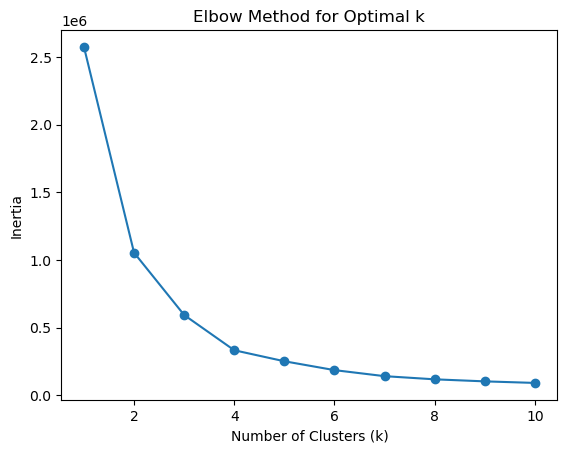

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Inertia values for different k
inertia_values = []

# Test different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


2. Silhouette Score:

Calculate the silhouette score for different values of k. The silhouette score measures how well-separated the clusters are.
Choose the k that maximizes the silhouette score.

C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

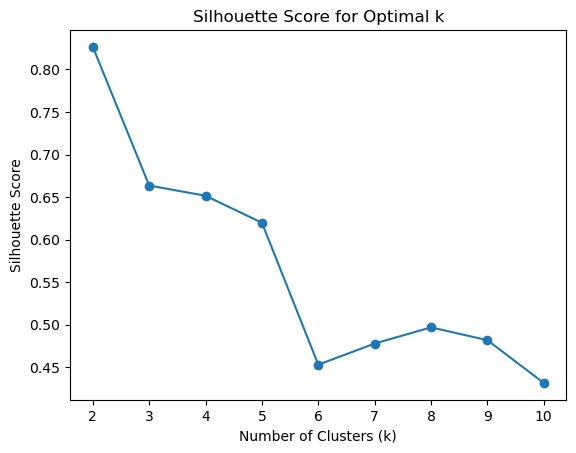

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Test different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Gap Statistics:

Compare the inertia of your clustering to the expected inertia of a random distribution.
Choose the k that maximizes the gap between the observed and expected inertias.
The gap statistic involves generating random data and comparing the clustering of the actual data with the clustering of the random data. Implementation can be more involved, and you may use external libraries or functions for this purpose.

In [11]:
pip install gap-stat


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: still running...
  Installing backend dependencies: still running...
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6137 sha256=abeb5ab7e19632c7d34f6005ca1a4867c6b828300ad91a103b7684a82a90bdd3
  Stored in directory: c:\users\viren\appdata\local\pip\cache\wheels\0b\17\a7\32188dacfe9b77972af23712793850e6ce97b1db31f397cd2e
Successfully built gap-stat


In [17]:
# Example using the gap statistic from the `gap_statistic` library

from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(x, cluster_array=np.arange(1, 11))
print(f"Optimal number of clusters (k): {n_clusters}")

Optimal number of clusters (k): 1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate random data for clustering
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)


In [22]:
X.shape, y.shape

((300, 2), (300,))

C:\Users\viren\AppData\Local\Temp\ipykernel_31300\773603245.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


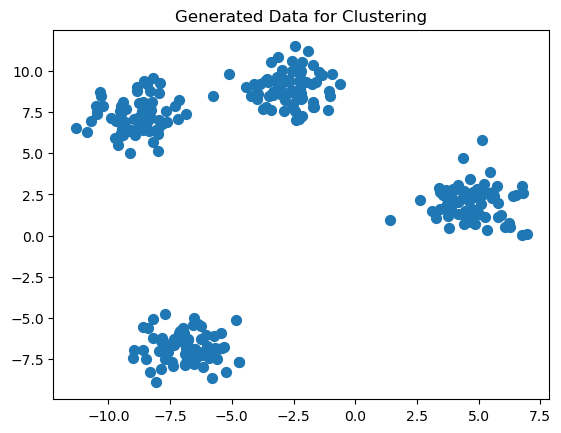

In [13]:
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data for Clustering")
plt.show()

In [14]:
# Apply k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [15]:
# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

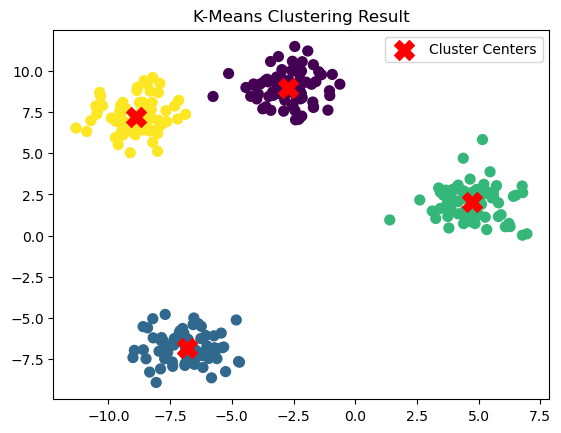

In [16]:

# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()

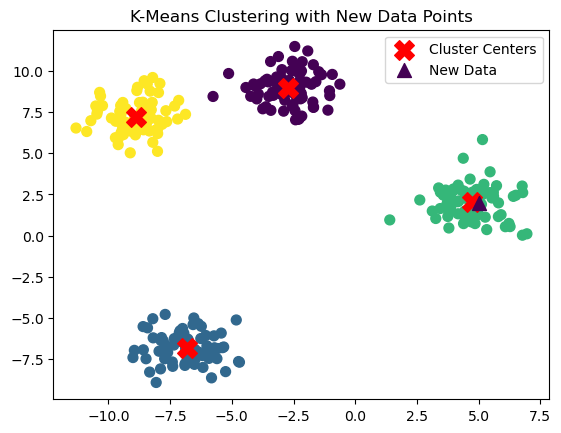

Predicted Labels for New Data: [2]


In [26]:
# New data points for prediction
new_data = np.array([[5, 2]])

# Predict the cluster assignments for new data points
new_labels = kmeans.predict(new_data)

# Visualize the new data points with predicted labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.scatter(new_data[:, 0], new_data[:, 1], c=new_labels, marker='^', s=100, cmap='viridis', label='New Data')
plt.title("K-Means Clustering with New Data Points")
plt.legend()
plt.show()

print("Predicted Labels for New Data:", new_labels)

C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\viren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


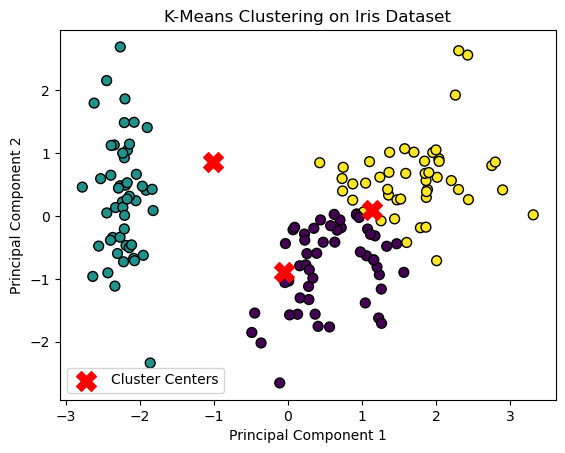

     cluster  species
0          1        0
1          1        0
2          1        0
3          1        0
4          1        0
..       ...      ...
145        2        2
146        0        2
147        2        2
148        2        2
149        0        2

[150 rows x 2 columns]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Standardize the features (important for KMeans)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Apply KMeans clustering
k = 3  # Number of clusters (since there are three iris species)
kmeans = KMeans(n_clusters=k, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_scaled)

# Visualize the clustered data using PCA for dimensionality reduction
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# Plot the clustered data in 2D
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Check the cluster assignments and compare with the true labels
iris_df['species'] = iris.target
print(iris_df[['cluster', 'species']])
